In [1]:
import cv2

In [2]:
cv2.__version__

'4.0.1'

In [3]:
cv2.TrackerBoosting_create()

<TrackerBoosting 000001A4A30021B0>

In [4]:
import cv2
import numpy as np
import math
import typing
import os
def show(frame):
    cv2.imshow("test", frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def plot_point(frame,x,y,color=(0,255,0)):
    radius = 1
    thickness = -1
    return cv2.circle(frame, (x,y), radius, color, thickness)
def plot_line(frame,p1,p2,color=(0,191,255)):
    thickness = 2
    return cv2.line(frame, (p1[0],p1[1]), (p2[0],p2[1]), color, thickness)
def loadvideo(filename: str) -> np.ndarray:
    """Loads a video from a file.

    Args:
        filename (str): filename of video

    Returns:
        A np.ndarray with dimensions (channels=3, frames, height, width). The
        values will be uint8's ranging from 0 to 255.

    Raises:
        FileNotFoundError: Could not find `filename`
        ValueError: An error occurred while reading the video
    """

    if not os.path.exists(filename):
        raise FileNotFoundError(filename)
    capture = cv2.VideoCapture(filename)

    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

    v = np.zeros((frame_count, frame_height, frame_width, 3), np.uint8)

    for count in range(frame_count):
        ret, frame = capture.read()
        if not ret:
            raise ValueError("Failed to load frame #{} of {}.".format(count, filename))

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        v[count] = frame

    v = v.transpose((3, 0, 1, 2))

    return v
def savevideo(filename: str, array: np.ndarray, fps: typing.Union[float, int] = 1):
    """Saves a video to a file.

    Args:
        filename (str): filename of video
        array (np.ndarray): video of uint8's with shape (channels=3, frames, height, width)
        fps (float or int): frames per second

    Returns:
        None
    """

    c, f, height, width = array.shape

    if c != 3:
        raise ValueError("savevideo expects array of shape (channels=3, frames, height, width), got shape ({})".format(", ".join(map(str, array.shape))))
    fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))

    for i in range(f):
        out.write(array[:, i, :, :].transpose((1, 2, 0)))

        


In [5]:
import cv2
import numpy as np
def show(frame):
    cv2.imshow("test", frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def load(vid):
    vid = loadvideo(vid)
    #vid = np.transpose(vid,(1,2,3,0))
    vid = vid[:,:,:,:112]
    return vid

In [6]:
def midpoint(point1,point2):
    return (point1+point2)/2
def change(points):
    point_arr = [points[0]]
    for i in points[1:]:
        point_arr.append(midpoint(point_arr[-1],i))
    return np.array(point_arr)
import matplotlib.pyplot as plt
def delta(points):
    point_arr = [points[0]]
    for i in points[1:]:
        if np.linalg.norm(i-point_arr[-1])<2:
            point_arr.append(point_arr[-1])
        else:
            point_arr.append(i)
    return np.array(point_arr)
    #plt.hist(point_arr,bins=50)
    #plt.show()
    #for i in range(1,len(points)):
    #    print(np.linalg.norm(points[i]-points[i-1]))

In [7]:
key_points = []
import pandas as pd
df = pd.read_csv('C:\\Users\\TheurerJ\\Documents\\John\\dynamic\\echonet_segmentation_analysis\\Midpoint.csv')

In [8]:
df.head()

,Unnamed: 0,FileNames,Frame,X1,Y1,X2,Y2
0,0,0X100009310A3BD7FC.avi,0,50,70,76,67
1,1,0X100009310A3BD7FC.avi,1,50,69,76,67
2,2,0X100009310A3BD7FC.avi,2,50,69,76,67
3,3,0X100009310A3BD7FC.avi,3,51,69,76,67
4,4,0X100009310A3BD7FC.avi,4,50,68,75,67


In [9]:
from tqdm import tqdm
folder = 'C:\\Users\\TheurerJ\\Documents\\Data\\segmented'
output = 'C:\\Users\\TheurerJ\\Documents\\John\\dynamic\\echonet_segmentation_analysis\\E_prime'
filenames = []
frame_num = []
length1 = []
length2 = []

for vid in tqdm(os.listdir(folder)):
    try:
        if len(df[df.FileNames==vid])>0:
            temp = df[df.FileNames==vid]
            exists = True

        video_file = os.path.join(folder,vid)
        first = load(video_file)
        spare = first.copy()
        first = np.transpose(first,(1,2,3,0))
        video = []

        for i in range(0,len(first)):
            
            X1 = int(temp[temp.Frame ==i].X1.tolist()[0])
            Y1 = int(temp[temp.Frame ==i].Y1.tolist()[0])
            X2 = int(temp[temp.Frame ==i].X2.tolist()[0])
            Y2 = int(temp[temp.Frame ==i].Y2.tolist()[0])
            img = plot_point(first[i],X1,Y1)
            img = plot_line(img,[X1,Y1],[60,5])
            img = plot_point(img,X2,Y2)
            img = plot_line(img,[X2,Y2],[60,5])
            img = plot_point(img,60,5,color=(255,0,255))
            filenames.append(vid)
            frame_num.append(i)
            length1.append(np.sqrt((X1-60)**2+(Y1-5)**2))
            length2.append(np.sqrt((X2-60)**2+(Y2-5)**2))

            video.append(img)
        video = np.transpose(np.array(video),(3,0,1,2))

        savevideo(os.path.join(output,vid),video,fps=30)
    except:
        print(vid)


  3%|██▋                                                                            | 111/3229 [00:58<21:16,  2.44it/s]

0X112505A983BB4D8E.avi


  5%|███▋                                                                           | 149/3229 [01:22<32:46,  1.57it/s]

0X118EF5AEED2E28EC.avi


 18%|██████████████▌                                                                | 597/3229 [05:17<17:57,  2.44it/s]

0X17828CD670289D36.avi


 35%|███████████████████████████▏                                                  | 1127/3229 [09:35<12:13,  2.87it/s]

0X1E3989E1CA499ADC.avi


 49%|██████████████████████████████████████▌                                       | 1594/3229 [13:29<10:46,  2.53it/s]

0X23D7360CB2EF9A53.avi


 51%|████████████████████████████████████████                                      | 1656/3229 [13:59<09:56,  2.64it/s]

0X249FE2498B57B632.avi


 65%|███████████████████████████████████████████████████                           | 2113/3229 [17:31<07:51,  2.37it/s]

0X2A2C1D627826C72.avi


 70%|██████████████████████████████████████████████████████▎                       | 2248/3229 [18:33<06:43,  2.43it/s]

0X2BB72AFEFA5753AA.avi


 75%|██████████████████████████████████████████████████████████▊                   | 2433/3229 [20:01<05:37,  2.36it/s]

0X2DE58B024738E3C7.avi


 76%|███████████████████████████████████████████████████████████▌                  | 2467/3229 [20:20<06:37,  1.91it/s]

0X2E52102EE379C357.avi


100%|██████████████████████████████████████████████████████████████████████████████| 3229/3229 [26:43<00:00,  2.01it/s]


(array([5.38000e+02, 8.41200e+03, 7.59940e+04, 1.95469e+05, 1.27602e+05,
        8.48740e+04, 5.70530e+04, 1.82640e+04, 2.55400e+03, 1.28000e+02]),
 array([ 34.0147027,  42.3746099,  50.7345171,  59.0944243,  67.4543315,
         75.8142387,  84.1741459,  92.5340531, 100.8939603, 109.2538675,
        117.6137747]),
 <a list of 10 Patch objects>)

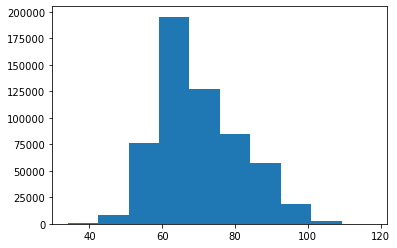

In [10]:
plt.hist(length2)

In [11]:
E_Prime = pd.DataFrame({"filenames":filenames,"Frame":frame_num,"Length 1":length1,"Length 2":length2})

In [12]:
print(len(filenames),len(frame_num),len(length1),len(length2))

570888 570888 570888 570888


In [13]:
E_Prime.to_csv("E_Prime.csv")